In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [56]:
import k_nn_classifier

# load data

In [3]:
import sys
sys.path.insert(0, "../research/fashion-mnist/")

In [4]:
from utils import mnist_reader
X_train, y_train = mnist_reader.load_mnist('../research/fashion-mnist/data/fashion', kind='train')
# X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [5]:
X_train.shape

(60000, 784)

# tsne

In [6]:
from openTSNE import TSNE, TSNEEmbedding, affinity, initialization
from openTSNE import initialization
from openTSNE.callbacks import ErrorLogger

In [7]:
tsne = TSNE(
    n_jobs=8,
    # The embedding will be appended to the list we defined above, make sure we copy the
    # embedding, otherwise the same object reference will be stored for every iteration
)

In [8]:
%time embedding_dft = tsne.fit(X_train)

/home/antoine/anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/numba-0.44.0-py3.7-linux-x86_64.egg/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/pynndescent-0.3.0-py3.7.egg/pynndescent/rp_trees.py", line 132:
<source missing, REPL/exec in use?>

  self.func_ir.loc))
/home/antoine/anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/numba-0.44.0-py3.7-linux-x86_64.egg/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics f

CPU times: user 15min 27s, sys: 38.6 s, total: 16min 6s
Wall time: 2min 45s


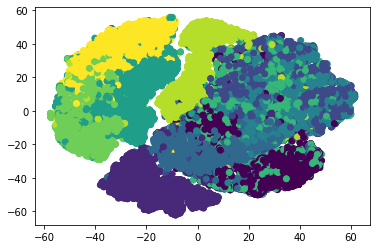

In [143]:
fig, ax = plt.subplots()
ax.scatter(embedding_dft[:,0], embedding_dft[:,1], c=y_train, rasterized=True)

In [144]:
fig.savefig('./mnist_fashion_tsne_default.pdf')

In [54]:
k_nn_classifier.K_NN_classifier(embedding_dft, y_train)

0.81

# force pivot

## default

In [11]:
import forcelayout as fl

In [12]:
from forcelayout import distance

CPU times: user 4min 7s, sys: 5.18 s, total: 4min 12s
Wall time: 4min 7s


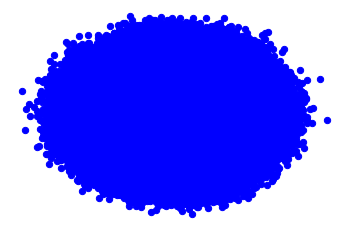

In [61]:
%time layout_pivot = fl.draw_spring_layout(X_train, algorithm=fl.Pivot, distance=distance.euclidean)

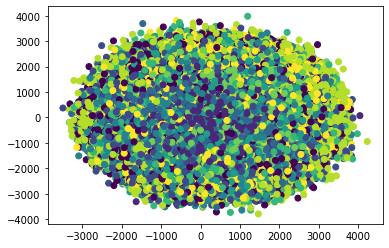

In [134]:
embedding_force = layout_pivot.get_positions()

fig, ax = plt.subplots()
ax.scatter(embedding_force[:,0], embedding_force[:,1], c=y_train, rasterized=True)

In [63]:
k_nn_classifier.K_NN_classifier(embedding_force, y_train)

0.13986666666666667

In [135]:
from sklearn import preprocessing

In [137]:
embedding_force_white = preprocessing.scale(embedding_force)

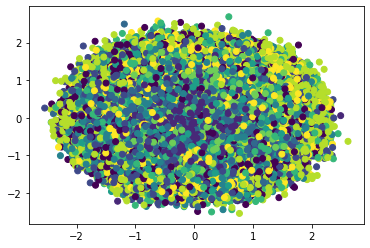

In [139]:
fig, ax = plt.subplots()
ax.scatter(embedding_force_white[:,0], embedding_force_white[:,1], c=y_train, rasterized=True)

In [140]:
fig.savefig('mnist_fashion_pivot.pdf')

## more iterations

In [111]:
%%time
pivot_layout = fl.Pivot(X_train, 
                        sample_layout_iterations = 200,
                        remainder_layout_iterations = 100,
                        refine_layout_iterations = 5,
                        )
pivot_layout.spring_layout()

CPU times: user 25min 57s, sys: 8.29 s, total: 26min 6s
Wall time: 25min 57s


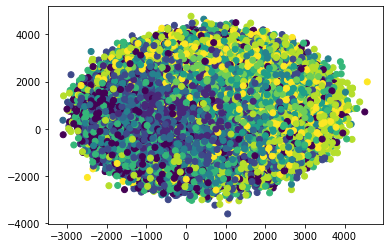

In [141]:
pivot_layout_pos = pivot_layout.get_positions()

fig, ax = plt.subplots()
ax.scatter(pivot_layout_pos[:,0], pivot_layout_pos[:,1], c=y_train, rasterized=True)

In [142]:
fig.savefig('mnist_fashion_pivot_more_iter.pdf')

In [113]:
k_nn_classifier.K_NN_classifier(pivot_layout_pos, y_train)

0.17353333333333334

#  force chalmers

CPU times: user 16min 51s, sys: 193 ms, total: 16min 51s
Wall time: 16min 51s


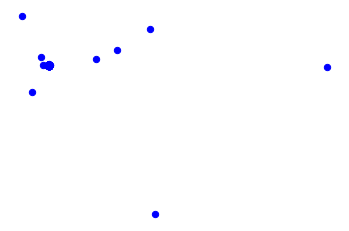

In [64]:
%time layout_chalmers = fl.draw_spring_layout(X_train, algorithm=fl.NeighbourSampling, distance=distance.euclidean)

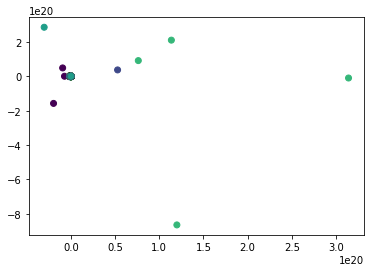

In [145]:
embedding_chalmers = layout_chalmers.get_positions()

fig, ax = plt.subplots()
ax.scatter(embedding_chalmers[:,0], embedding_chalmers[:,1], c=y_train, rasterized=True)

In [146]:
fig.savefig('./mnist_fashion_chalmers.pdf')

In [90]:
# remove outliers
embedding_chalmers_filt = embedding_chalmers.copy()
embedding_chalmers_filt[(np.linalg.norm(embedding_chalmers, axis=1) > 1e18)] = (0,0)

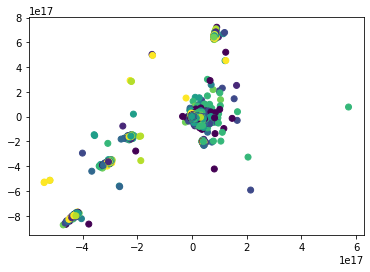

In [147]:

fig, ax = plt.subplots()
ax.scatter(embedding_chalmers_filt[:,0], embedding_chalmers_filt[:,1], c=y_train, rasterized=True)

In [148]:
fig.savefig('./mnist_fashion_chalmers_filtered.pdf')

In [66]:
k_nn_classifier.K_NN_classifier(embedding_chalmers, y_train)

0.10353333333333334

CPU times: user 13min 21s, sys: 8.13 s, total: 13min 29s
Wall time: 13min 20s


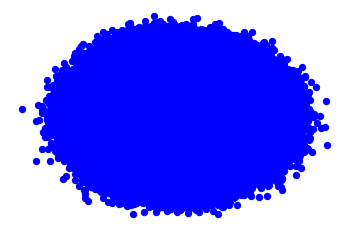

In [67]:
%time layout_chalmers_1 = fl.draw_spring_layout(embedding_force, algorithm=fl.NeighbourSampling, distance=distance.euclidean)

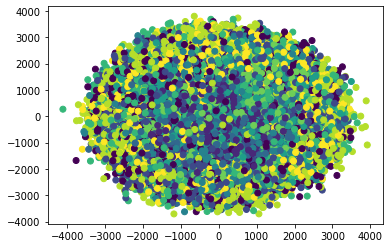

In [68]:
embedding_chalmers = layout_chalmers_1.get_positions()

fig, ax = plt.subplots()
ax.scatter(embedding_chalmers[:,0], embedding_chalmers[:,1], c=y_train, rasterized=True)

In [69]:
k_nn_classifier.K_NN_classifier(embedding_chalmers, y_train)

0.13866666666666666

## check max velocity

In [114]:
chalmers_layout = fl.NeighbourSampling(X_train)

In [126]:
import math

In [130]:
# def _calculate_velocity(self, source: Node, target: Node, alpha: float=1,
#                             cache_distance: bool = False) -> Tuple[float, float]:
#         """
#         Calculate the spring force to apply between two nodes i and j
#         """
#         x, y = self._current_distance(source, target)
#         dist = math.hypot(x, y)
#         real_dist = self.distance(source, target, cache=cache_distance)
#         force = self._force(dist, real_dist, alpha)
#         return (x * force, y * force)

n0 = chalmers_layout.nodes[0]
n1 = chalmers_layout.nodes[2]

chalmers_layout._calculate_velocity(n0, n1)

x, y = chalmers_layout._current_distance(n0, n1)
dist = math.hypot(x, y)
real_dist = chalmers_layout.distance(n0, n1)
force = chalmers_layout._force(dist, real_dist, 1)

print(force)

-181450632.73075616


In [133]:
np.min([1000, 32819083120])

1000

# check if nodes are kept in order

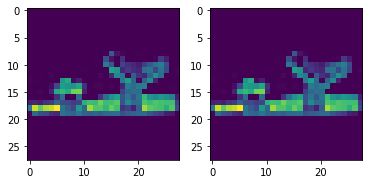

In [103]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(layout.nodes[-1].datapoint.reshape((28,28)))
ax[1].imshow(X_train[-1].reshape((28,28)))